<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 3. <b>Классификация текстовых данных и </b> <span style="font-weight:bold; color:green">scikit-learn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href='css/style.css' rel='stylesheet' type='text/css'>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = 'Куприянов' #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print('Ваш вариант - ', variant)

Ваш вариант -  1


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с последующими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>11 мая 2017</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-25%</b>, вторая неделя и далее до конца модуля <b>-50%</b>
      </p>
  </div>
</div>

<p><b>Варианты</b></p>

<ol>
    <li>
        Набор электронных сообщений (emails) - <b>спам/не спам</b> - <a href="http://csmining.org/index.php/spam-email-datasets-.html">источник</a> - файл c данными: <b>data/emails.tsv</b>
    </li>
    <li>
        Набор SMS сообщений (sms) - <b>спам/не спам</b> - <a href="https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection">источник</a> - файл c данными: <b>data/SMSSpamCollection</b>
    </li>
    <li>Набор рецензий на фильмы (reviews) - <b>positive/negative</b> - <a href="http://www.cs.cornell.edu/people/pabo/movie-review-data/">источник</a> - файл c данными: <b>data/reviews.tsv</b></li>
</ol>

<p><b>Задача 1.</b> Классификация текстовых сообщений <b><i>(2 балла)</i></b></p>

<ol>
    <li>Загрузите исходные данные</li>
    <li>Разбейте загруженные данные на обучающее (train) и тестовое подможества (test)</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [3]:
random_state = 123 # для всех объектов/методов/моделей

## 1. Загружаем данные

In [4]:
# подключим необходимые библиотеки
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy.polynomial.polynomial import polyval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer

%matplotlib inline
plt.style.use('ggplot')

In [8]:
df = pd.read_table('data/emails.tsv', sep='\t', names=['label', 'email'])
df.head()

,label,email
0,0,\n\nCONSANTLY being\nbombarded by so-called FR...
1,0,link to my webcam you wanted Wanna see sexuall...
2,1,Re: How to manage multiple Internet connection...
3,0,[SPAM] Give her 3 hour rodeoEnhance your desi...
4,0,Best Price on the netf5f8m1 (suddenlysusan@Sto...


Избавляемся от лишних символов, таких как перенос каретки, символ новой строки и символ табуляции (почему они считались - я не знаю.)

In [9]:
df.loc[:, 'email'] = df.loc[:, 'email'].str.replace('\n', '')\
                                       .str.replace('\r', '')\
                                       .str.replace('\t', '')
df.head()

,label,email
0,0,CONSANTLY beingbombarded by so-called FREE mon...
1,0,link to my webcam you wanted Wanna see sexuall...
2,1,Re: How to manage multiple Internet connection...
3,0,[SPAM] Give her 3 hour rodeoEnhance your desi...
4,0,Best Price on the netf5f8m1 (suddenlysusan@Sto...


Делим выборку на тренировочную и тестовую.

In [10]:
X_init = np.array(df.loc[:, 'email'].astype(str))
y_init = np.array(df.loc[:, 'label'].astype(int))

In [11]:
X_train_text, X_test_text, y_train, y_test = train_test_split(X_init,
                                                              y_init,
                                                              random_state=random_state)

In [12]:
tf = TfidfVectorizer(lowercase=True, ngram_range=(1,1))
tf.fit(X_init);

Переводим тексты сообщений в векторы.

In [13]:
X_train_vec = tf.transform(X_train_text)

In [14]:
X_test_vec = tf.transform(X_test_text)

Для избежания принципа DRY делаем метод для трех классификаторов.

In [15]:
from timeit import default_timer as timer

def classify (clf):
    print(clf.__class__.__name__)
    start = timer()
    clf.fit(X_train_vec, y_train);
    end = timer()
    time_to_fit = end - start
    
    start = timer()
    predictions = clf.predict(X_test_vec);
    end = timer()
    time_to_predict = end - start
    acc = accuracy_score(predictions, y_test)
    
    print('Time to fit: {:.4} ms'.format(time_to_fit))
    print('Time to predict: {:.4} ms'.format(time_to_predict))
    print('Accuracy score: {:.4%}\n'.format(acc))

In [16]:
classifiers = []
classifiers.append(KNeighborsClassifier(n_neighbors=5))
classifiers.append(LogisticRegression(penalty='l2', 
                                      fit_intercept=True, 
                                      max_iter=100, 
                                      C=1, 
                                      solver='lbfgs', 
                                      random_state=12345))
classifiers.append(MultinomialNB(alpha=1))

In [17]:
for clf in classifiers:
    classify(clf)

KNeighborsClassifier
Time to fit: 0.009781 ms
Time to predict: 0.9187 ms
Accuracy score: 47.6895%

LogisticRegression
Time to fit: 1.409 ms
Time to predict: 0.002385 ms
Accuracy score: 96.2107%

MultinomialNB
Time to fit: 0.03955 ms
Time to predict: 0.02 ms
Accuracy score: 79.5749%



<p><b>Задача 2.</b> Применение k-folds <b><i>(3 балла)</i></b></p>

<p>Повторите решение задачи 1, но с ипользованием k-folds (k=4) для разделения исходных данных, обучения и тестирования.</p>

In [18]:
random_state = 123 # для всех объектов/методов/моделей

In [19]:
kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

Для каждого фолда будем векторизовать данные.

In [20]:
def classify_k_fold (clf, n_gram=1, verbose=False, return_result=False):
    if verbose:
        print(clf.__class__.__name__)
        
    tf = TfidfVectorizer(lowercase=True, ngram_range=(n_gram, n_gram))
    acc_res, time_to_fit_res, time_to_predict_res = [], [], []
    
    for train_index, test_index in kf.split(X_init):
        X_train, X_test = X_init[train_index], X_init[test_index]
        y_train, y_test = y_init[train_index], y_init[test_index]
        
        X_train_vec = tf.fit_transform(X_train)
        X_test_vec = tf.transform(X_test)
        
        start = timer()
        clf.fit(X_train_vec, y_train);
        end = timer()
        time_to_fit = end - start

        start = timer()
        predictions = clf.predict(X_test_vec);
        end = timer()
        time_to_predict = end - start
        
        acc_res.append(accuracy_score(predictions, y_test))
        time_to_fit_res.append(time_to_fit)
        time_to_predict_res.append(time_to_predict)
    
    if verbose:
        print('Time to fit: {:.4} ms'.format(np.mean(time_to_fit_res)))
        print('Time to predict: {:.4} ms'.format(np.mean(time_to_predict_res)))
        print('Accuracy score: {:.4%}\n'.format(np.mean(acc_res)))
        
    if return_result:
        return np.mean(np.mean(time_to_fit_res)), np.mean(time_to_predict_res), np.mean(acc_res)

In [21]:
for clf in classifiers:
    classify_k_fold(clf, verbose=True)

KNeighborsClassifier
Time to fit: 0.005028 ms
Time to predict: 0.878 ms
Accuracy score: 45.3521%

LogisticRegression
Time to fit: 1.293 ms
Time to predict: 0.004701 ms
Accuracy score: 96.9490%

MultinomialNB
Time to fit: 0.02437 ms
Time to predict: 0.004448 ms
Accuracy score: 81.3691%



<p><b>Задача 3.</b> Выбор модели <b><i>(5 баллов)</i></b></p>

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами: </p>

<p>K-ближайших соседей</p>

In [22]:
ns = np.arange(1, 150, 20) # количество соседей
ns

array([  1,  21,  41,  61,  81, 101, 121, 141])

<p>Логистическая регрессия</p>

In [23]:
cs = np.logspace(-2, 10, 8, base=10) # параметр регуляризации
cs

array([  1.00000000e-02,   5.17947468e-01,   2.68269580e+01,
         1.38949549e+03,   7.19685673e+04,   3.72759372e+06,
         1.93069773e+08,   1.00000000e+10])

<p>Мультиномиальный наивный Байес</p>

In [24]:
alphas = np.logspace(-4, 1, 8, base=10) # сглаживающий параметр
alphas

array([  1.00000000e-04,   5.17947468e-04,   2.68269580e-03,
         1.38949549e-02,   7.19685673e-02,   3.72759372e-01,
         1.93069773e+00,   1.00000000e+01])

<p style="padding-left:15px;">3. Постройте графики (параметры модели)-(доля правильных классификаций) при обучении и валидации <br>
4. Выберите лучшую модель для каждого метода, используя значение качества классификации (использовать долю правильных классификаций)<br>
5. Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
6. Повторите шаги 2-4 для n-gram=2<br>
7. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
8. Сделайте выводы по полученным результатам (преимущества и недостатки методов)
</p>

In [25]:
random_state = 123 # для всех объектов/методов/моделей

In [26]:
def print_info (clf, fit_time, pred_time, acc_score, varz):
    print(clf)
    print('Accs: {}'.format(acc_score))
    print('Args: {}'.format(varz))
    print('Time to fit: {:.4} ms'.format(np.mean(fit_time)))
    print('Time to predict: {:.4} ms'.format(np.mean(pred_time)))
    print('Accuracy score: {:.4%}\n'.format(np.mean(acc_score)))

In [27]:
def plot_res (varz, accs, title):
    plt.title(title)
    plt.xlim(-10, 152)
#     plt.xticks(varz)
#     plt.yticks(accs)
    plt.plot(varz, accs);
    plt.show()

In [28]:
def classify_var_params_plot (): 
    n_grams = (1, 2)    
    for n_gram in n_grams:
        time_to_fit_res, time_to_predict_res, knn_res, lr_res, mnb_res = [], [], [], [], []
        for n in ns:
            knn = KNeighborsClassifier(n_neighbors=n)
            time_to_fit, time_to_predict, acc = classify_k_fold(clf=knn, n_gram=n_gram, return_result=True)
            knn_res.append(acc)
            time_to_fit_res.append(time_to_fit)
            time_to_predict_res.append(time_to_predict)
        print_info('KNeighborsClassifier', time_to_fit_res, time_to_predict_res, knn_res, ns)
        plot_res(ns, knn_res, 'KNN accuracy depending on # of neighbors. N_grams = {}'.format(n_gram))
        
        time_to_fit_res, time_to_predict_res = [], []
        for c in cs:
            lr = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100, C=c, solver='lbfgs', random_state=12345)
            time_to_fit, time_to_predict, acc = classify_k_fold(clf=lr, n_gram=n_gram, return_result=True)
            lr_res.append(acc)
            time_to_fit_res.append(time_to_fit)
            time_to_predict_res.append(time_to_predict)
        print_info('LogisticRegression', time_to_fit_res, time_to_predict_res, lr_res, cs)
        plot_res(cs, lr_res, 'LR accuracy depending on regularization parameter. N_grams = {}'.format(n_gram))

        time_to_fit_res, time_to_predict_res = [], []
        for alpha in alphas:
            mnb = MultinomialNB(alpha=alpha)
            time_to_fit, time_to_predict, acc = classify_k_fold(clf=mnb, n_gram=n_gram, return_result=True)
            mnb_res.append(acc)
            time_to_fit_res.append(time_to_fit)
            time_to_predict_res.append(time_to_predict)
        print_info('MultinomialNB', time_to_fit_res, time_to_predict_res, mnb_res, alphas)
        plot_res(alphas, mnb_res, 'MNB accuracy depending on alpha. N_grams = {}'.format(n_gram))

KNeighborsClassifier
Accs: [0.63522428230176409, 0.33378760338633529, 0.68092651426675854, 0.83748510227915884, 0.84326785460850417, 0.83864699626039418, 0.83725789600578637, 0.83725960593070359]
Args: [  1  21  41  61  81 101 121 141]
Time to fit: 0.005084 ms
Time to predict: 0.8761 ms
Accuracy score: 73.0482%



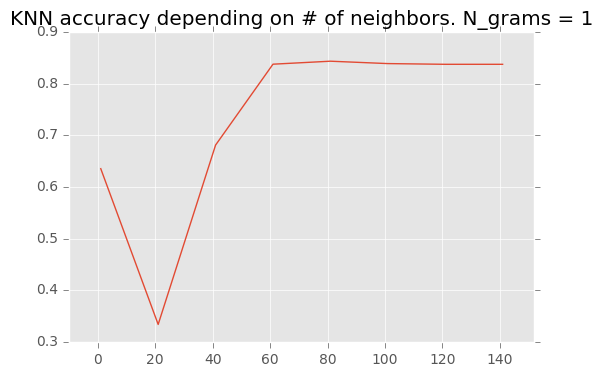

LogisticRegression
Accs: [0.68146941542796857, 0.95908705398745941, 0.98358856812597351, 0.98474447736999871, 0.98335730078092276, 0.98358856812597362, 0.98220288772120012, 0.98243351384440714]
Args: [  1.00000000e-02   5.17947468e-01   2.68269580e+01   1.38949549e+03
   7.19685673e+04   3.72759372e+06   1.93069773e+08   1.00000000e+10]
Time to fit: 2.424 ms
Time to predict: 0.001996 ms
Accuracy score: 94.2559%



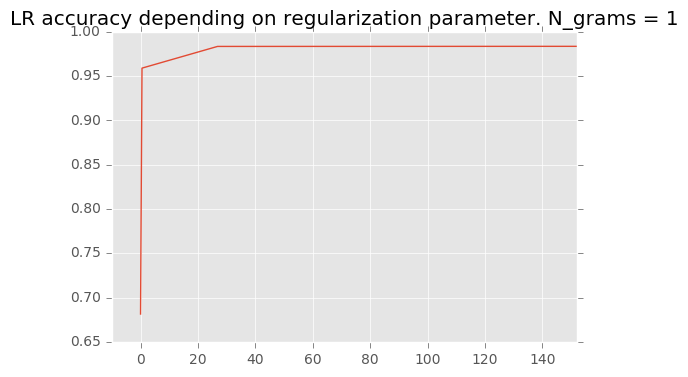

MultinomialNB
Accs: [0.96694757883181337, 0.96856538154409633, 0.96972107704750687, 0.96902748875296885, 0.9613992999567389, 0.8897434001173008, 0.77069799990082433, 0.69765321354739318]
Args: [  1.00000000e-04   5.17947468e-04   2.68269580e-03   1.38949549e-02
   7.19685673e-02   3.72759372e-01   1.93069773e+00   1.00000000e+01]
Time to fit: 0.02599 ms
Time to predict: 0.0047 ms
Accuracy score: 89.9219%



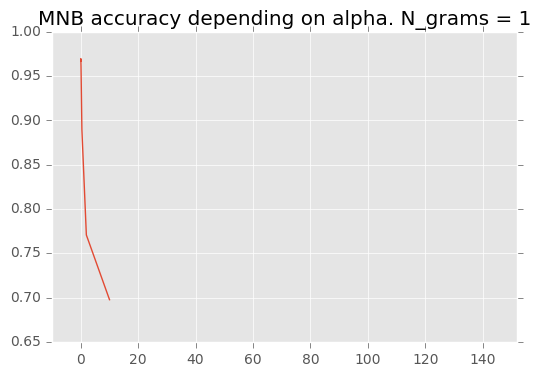

KNeighborsClassifier
Accs: [0.53512933872073676, 0.32477245174164404, 0.56922417286656934, 0.87030668358352381, 0.87955865982924686, 0.88210238688419196, 0.88210345558726522, 0.88279896754733489]
Args: [  1  21  41  61  81 101 121 141]
Time to fit: 0.006537 ms
Time to predict: 0.5097 ms
Accuracy score: 72.8250%



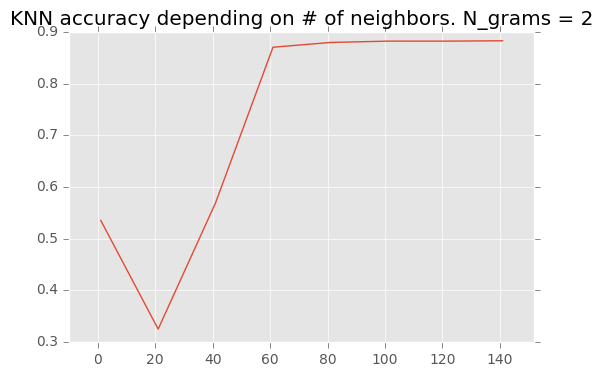

LogisticRegression
Accs: [0.68146941542796857, 0.87910595720741902, 0.96995148943009912, 0.97919555727308016, 0.9801201991720544, 0.9801206266532837, 0.97804050299151368, 0.9773462734751317]
Args: [  1.00000000e-02   5.17947468e-01   2.68269580e+01   1.38949549e+03
   7.19685673e+04   3.72759372e+06   1.93069773e+08   1.00000000e+10]
Time to fit: 11.81 ms
Time to predict: 0.004185 ms
Accuracy score: 92.8169%



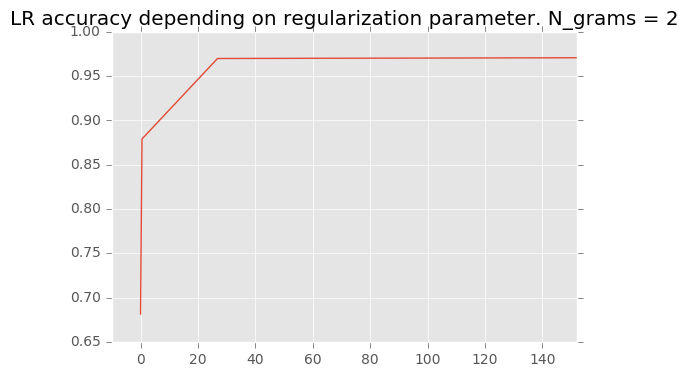

MultinomialNB
Accs: [0.97018190181269137, 0.97110632997105095, 0.97318666737343562, 0.97364920206353744, 0.96578974592225653, 0.91770772595375338, 0.8446657182283126, 0.71706855601970521]
Args: [  1.00000000e-04   5.17947468e-04   2.68269580e-03   1.38949549e-02
   7.19685673e-02   3.72759372e-01   1.93069773e+00   1.00000000e+01]
Time to fit: 0.1056 ms
Time to predict: 0.01514 ms
Accuracy score: 91.6669%



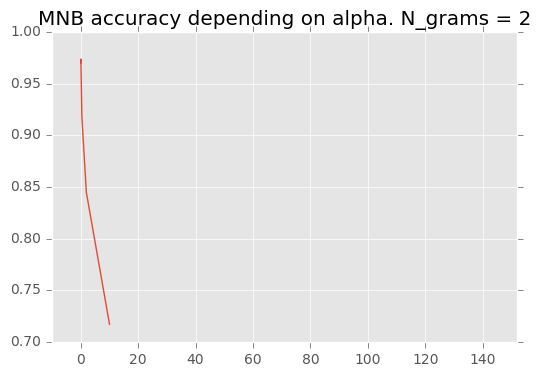

In [29]:
classify_var_params_plot()

$KNN$ на одном и двадцати одном соседях $KNN$ показывает ужасную accuracy: $63, 33$ и $53, 32$ для $n\_gram = 1$ и $n\_gram = 2$ соответственно. В остальном $KNN$ - около $90$. Это обусловлено тем, что задачах классификации текстов происходит торг между $recall$ и $precision$. А чем больше кол-во соседей тем выше $recall$ и тем меньше $precision$. Так же у $KNN$ самая худшая скорость предсказывания, использования пар слов вместо одиночных ($n\_gram = 2$) повысило её, но не сильно. Для лин. регрессии увеличение $n\_gram$ на $1$ понизило accuracy. На $MNB$ изменение $n\_gram$ никак не повлияло. Лучшую $accuracy$ показывает $LR$ на $n\_gram = 1$.

<p><b>Задача 3. (опционально)</b> Исследование влияния количества признаков FeatureHasher на качество классификации <b><i>(5 баллов к сумме по всем ДЗ)</i></b></p>

<p>Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [30]:
n_features = np.logspace(1, 5, 5, base=10).astype(int) # количество признаков
non_negative=True
n_features

array([    10,    100,   1000,  10000, 100000])

In [31]:
def optional_task(pl):
    gcv = GridSearchCV(pl[0], param_grid={'hashingvectorizer__n_features':n_features})
    gcv.fit(X_train_text, y_train)
    res = gcv.cv_results_['mean_test_score']
    print('{}: {}'.format(pl[1], gcv.best_params_['hashingvectorizer__n_features']))
    
    plt.title('Accuracy of {} depending on n_features.'.format(pl[1]))
    plt.xlabel('N features')
    plt.ylabel('Accuracy')
    plt.xscale('log')
    plt.plot(n_features, res, label=pl[1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<p>Можно воспользоваться GridSearchCV</p>

In [32]:
pipelines = []
knn_pl = make_pipeline(HashingVectorizer(stop_words='english', 
                                         non_negative=True), 
                                         TfidfTransformer(), 
                                         KNeighborsClassifier(n_neighbors=1))
lr_pl = make_pipeline(HashingVectorizer(stop_words='english', 
                                        non_negative=True), 
                                        TfidfTransformer(), 
                      LogisticRegression(C=60.0, penalty='l2', fit_intercept=True, max_iter=100, solver = 'lbfgs', random_state=12345)                 )
mnb_pl = make_pipeline(HashingVectorizer(stop_words='english', 
                                         non_negative=True),
                                         TfidfTransformer(), 
                                         MultinomialNB(alpha =0.04))

pipelines.append((knn_pl, 'KNeighborsClassifier'))
pipelines.append((lr_pl, 'LogisticRegression'))
pipelines.append((mnb_pl, 'MultinomialNB'))

Выведем опимальные $n\_features$ и построим график.

KNeighborsClassifier: 100
LogisticRegression: 100000
MultinomialNB: 100000


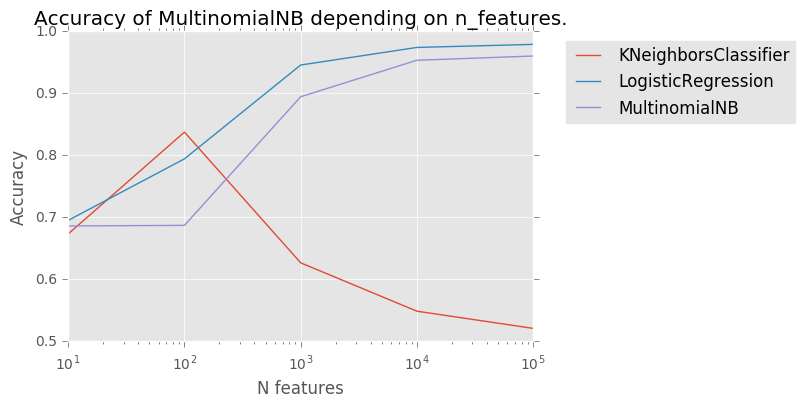

In [33]:
for pl in pipelines:
    optional_task(pl)
plt.show()

EOF.